<a href="https://colab.research.google.com/github/SEBASTIANVALDIVIESO/PRODUCTO_DATOS/blob/main/03_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. INFORMACION GENERAL DEL PRODUCTO DE DATOS**

**Predicción de la Demanda Futura de Internet fijo en Colombia:**

**Objetivo:** Predecir la demanda futura de Internet fijo en Colombia en los proximos años y trimestres.
Variables relevantes:
1. Fecha (Año y trimestre)
2. Departamento
3. Municipio
4. Proveedor
3. Tecnología (Fibra, ADSL, etc.)
4. Segmento (Residencial, Comercial, etc.)
5. Ancho de banda( Velocidad de bajada y de subida)

Variable resultante Y

6. SUSCRIPTORES

**Modelo recomendado:**
Modelos como Regresion Lineal, XGBoost o  Random Forest serían útiles aquí, ya que puedes capturar la influencia de múltiples variables de entrada (como la tecnología, la ubicación geográfica y el tipo de segmento) en la demanda futura de Internet.

# **USUARIO O CLIENTE**

Los usuarios finales de este producto de datos serían:

1. **Proveedores de Servicios de Internet (ISPs):**
Podrán identificar áreas con mayor crecimiento proyectado en la demanda de Internet. Esto les permite optimizar su inversión en infraestructura, planificar la expansión de servicios, y decidir qué tecnologías implementar (fibra, ADSL, etc.).
2. **Empresas de Tecnología y Consultoras:**
Podrán usar los datos para asesorar a ISPs o gobiernos en estrategias tecnológicas.
3. **Investigadores y Académicos:**
Los datos pueden ser útiles para estudios sobre brechas digitales, impacto socioeconómico de la conectividad, y planificación regional.
5. **Organizaciones sin Ánimo de Lucro (ONGs):**
Podrán enfocar proyectos en comunidades subatendidas o con mayores necesidades de conectividad, fomentando inclusión digital y equidad tecnológica.

# **2. CARGA DEL DATASET**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns

drive.mount('/content/drive')

%cd /content/drive/MyDrive/Notebooks_Clase_2/content/producto_de_datos


Mounted at /content/drive
/content/drive/MyDrive/Notebooks_Clase_2/content/producto_de_datos


In [ ]:
# Ruta completa del archivo CSV
file_path = 'DATOS_ORGANIZADOS.csv'

df = pd.read_csv(file_path)

In [ ]:
print(df.head())
print(df.tail())

        FECHA                                PROVEEDOR  COD_DEPARTAMENTO  \
0  2023-06-30                    DIRECTV COLOMBIA LTDA               8.0   
1  2021-06-30                              COCOM S.A.S              63.0   
2  2021-03-31      COMUNICACION CELULAR S A COMCEL S A               8.0   
3  2021-09-30  COLOMBIA TELECOMUNICACIONES S.A. E.S.P.              76.0   
4  2023-09-30                          DIFUDATOS S A S              25.0   

      DEPARTAMENTO  COD_MUNICIPIO         MUNICIPIO              SEGMENTO  \
0        ATLÁNTICO         8520.0  PALMAR DE VARELA  RESIDENCIAL_ESTRATO1   
1          QUINDÍO        63272.0          FILANDIA  RESIDENCIAL_ESTRATO2   
2        ATLÁNTICO         8001.0      BARRANQUILLA  RESIDENCIAL_ESTRATO2   
3  VALLE DEL CAUCA        76001.0              CALI  RESIDENCIAL_ESTRATO5   
4     CUNDINAMARCA        25224.0          CUCUNUBÁ           CORPORATIVO   

               TECNOLOGIA  VELOCIDAD_BAJADA  VELOCIDAD_SUBIDA  SUSCRIPTORES  
0 

# **3. ESTRUCTURA DEL DATA SET**

**Informacion General**

In [ ]:
df.head()

,FECHA,PROVEEDOR,COD_DEPARTAMENTO,DEPARTAMENTO,COD_MUNICIPIO,MUNICIPIO,SEGMENTO,TECNOLOGIA,VELOCIDAD_BAJADA,VELOCIDAD_SUBIDA,SUSCRIPTORES
0,2023-06-30,DIRECTV COLOMBIA LTDA,8.0,ATLÁNTICO,8520.0,PALMAR DE VARELA,RESIDENCIAL_ESTRATO1,TECNOLOGIA_INALAMBRICA,6,1,3
1,2021-06-30,COCOM S.A.S,63.0,QUINDÍO,63272.0,FILANDIA,RESIDENCIAL_ESTRATO2,TECNOLOGIA_INALAMBRICA,5,5,1
2,2021-03-31,COMUNICACION CELULAR S A COMCEL S A,8.0,ATLÁNTICO,8001.0,BARRANQUILLA,RESIDENCIAL_ESTRATO2,TECNOLOGIA_FIJA,10,5,43
3,2021-09-30,COLOMBIA TELECOMUNICACIONES S.A. E.S.P.,76.0,VALLE DEL CAUCA,76001.0,CALI,RESIDENCIAL_ESTRATO5,FIBRA_OPTICA,15,1,16
4,2023-09-30,DIFUDATOS S A S,25.0,CUNDINAMARCA,25224.0,CUCUNUBÁ,CORPORATIVO,TECNOLOGIA_INALAMBRICA,30,24,1


1. ¿Cuántas filas y columnas tiene el dataset?

In [ ]:
#Tamaño del dataset

df.shape

(2704343, 11)

2. ¿Qué nombres de columnas están presentes en el dataset?



In [ ]:
#Nombre de las columnas
df.columns

Index(['FECHA', 'PROVEEDOR', 'COD_DEPARTAMENTO', 'DEPARTAMENTO',
       'COD_MUNICIPIO', 'MUNICIPIO', 'SEGMENTO', 'TECNOLOGIA',
       'VELOCIDAD_BAJADA', 'VELOCIDAD_SUBIDA', 'SUSCRIPTORES'],
      dtype='object')

3. ¿Cuáles son los tipos de datos de cada columna?

In [ ]:
#Informacion general del dataframe con tipos de datos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704343 entries, 0 to 2704342
Data columns (total 11 columns):
 #   Column            Dtype  
---  ------            -----  
 0   FECHA             object 
 1   PROVEEDOR         object 
 2   COD_DEPARTAMENTO  float64
 3   DEPARTAMENTO      object 
 4   COD_MUNICIPIO     float64
 5   MUNICIPIO         object 
 6   SEGMENTO          object 
 7   TECNOLOGIA        object 
 8   VELOCIDAD_BAJADA  int64  
 9   VELOCIDAD_SUBIDA  int64  
 10  SUSCRIPTORES      int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 227.0+ MB


In [ ]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe(include='all'))


Estadísticas descriptivas:
             FECHA                            PROVEEDOR  COD_DEPARTAMENTO  \
count      2704343                              2704343      2.704343e+06   
unique          31                                 1383               NaN   
top     2023-09-30  COMUNICACION CELULAR S A COMCEL S A               NaN   
freq        194634                               568292               NaN   
mean           NaN                                  NaN      3.729643e+01   
std            NaN                                  NaN      2.664883e+01   
min            NaN                                  NaN      5.000000e+00   
25%            NaN                                  NaN      1.500000e+01   
50%            NaN                                  NaN      2.500000e+01   
75%            NaN                                  NaN      6.600000e+01   
max            NaN                                  NaN      9.900000e+01   

       DEPARTAMENTO  COD_MUNICIPIO     MUNICIPI

# ***4. ANALISIS UNIVARIADO***

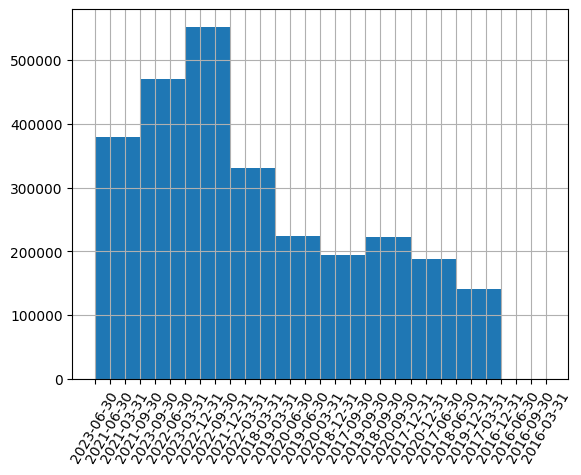

In [ ]:
#PENDIENTE ORGANIZAR - DIstribucion de variables individuales numericas ej AÑO
#Organizar esta tabla no por aumento de suscriptores, si no en orden ascendente por año o fecha

df['FECHA'].hist()
plt.xticks(rotation=60)
plt.show()

In [ ]:
#DIstribucion de variables individuales  CATEGORICAS ej TECNOLOGIA

print(df['TECNOLOGIA'].value_counts())

TECNOLOGIA
TECNOLOGIA_FIJA           1089969
FIBRA_OPTICA               823711
TECNOLOGIA_INALAMBRICA     578063
HIBRIDA                    202831
OTRAS_TECNOLOGIAS            7175
Name: count, dtype: int64


# **5. ANALISIS BIVARIADO**

**- FECHA VS SUSCRIPTORES**

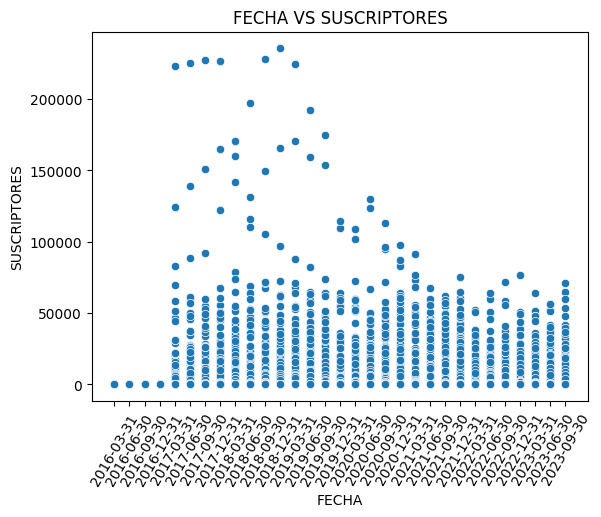

In [ ]:
# BORRAR Y SOLAMENTE DEJAR DATOS DESDE 2017 O REELEVANTES, REVISAR VALORES ATIPICOS

# DataFrame ordenado por columnaFecha
df = df.sort_values(by='FECHA')

#Para Fecha Vs Suscripciones
sns.scatterplot(x='FECHA', y='SUSCRIPTORES', data=df)

# Rotar las etiquetas a 60°
plt.xticks(rotation=60)
plt.title('FECHA VS SUSCRIPTORES')
plt.show()


**- Departamento Vs Suscripciones**

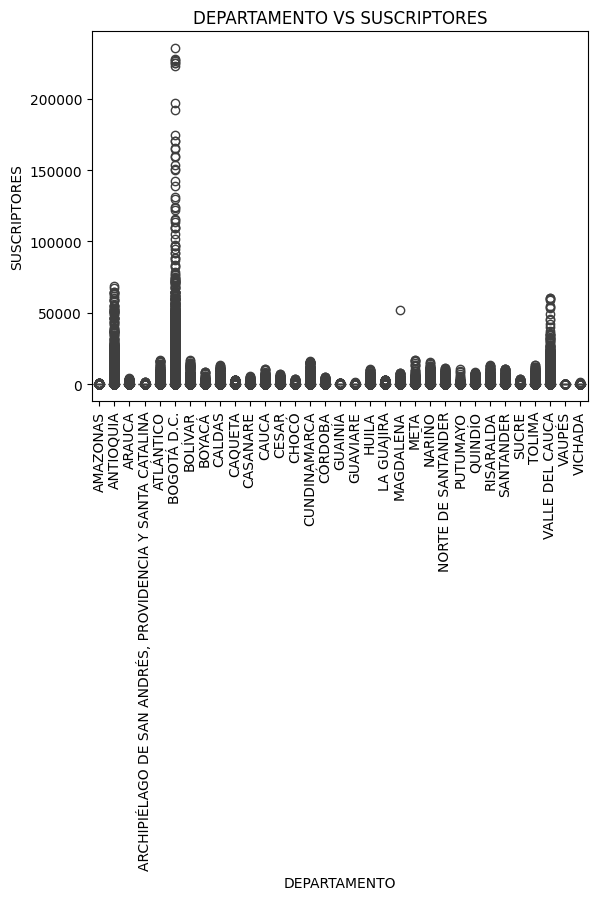

In [ ]:
# REVISAR VALORES ATIPICOS DE BOGOTA???

# DataFrame ordenado por columna DEPARTAMENTO
df = df.sort_values(by='DEPARTAMENTO')

#Para Departamento Vs Suscripciones
sns.boxplot(x='DEPARTAMENTO', y='SUSCRIPTORES', data=df)

# Rotar las etiquetas a 90°
plt.xticks(rotation=90)
plt.title('DEPARTAMENTO VS SUSCRIPTORES')
plt.show()

**- Tecnologia Vs Suscripciones**

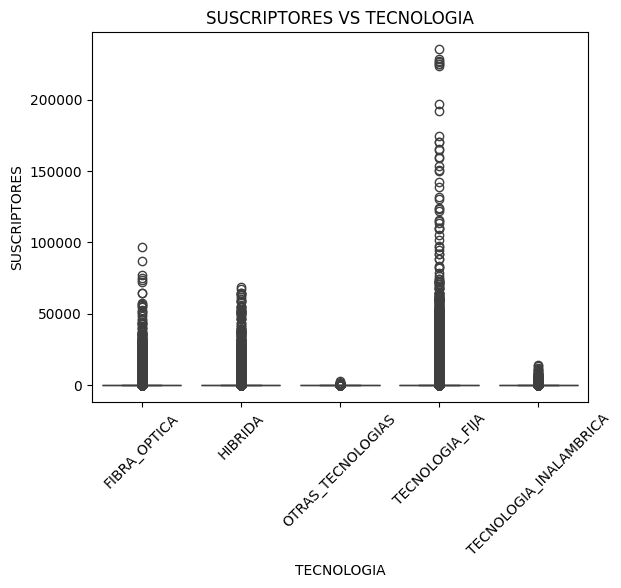

In [ ]:
# DataFrame ordenado por columna TECNOLOGIA
df = df.sort_values(by='TECNOLOGIA')

#Para Departamento Vs Suscripciones
sns.boxplot(x='TECNOLOGIA', y='SUSCRIPTORES', data=df)

# Rotar las etiquetas a 45°
plt.xticks(rotation=45)
plt.title('SUSCRIPTORES VS TECNOLOGIA')
plt.show()

# **6. DISTRIBUCION DE LAS VARIABLES NUMERICAS**

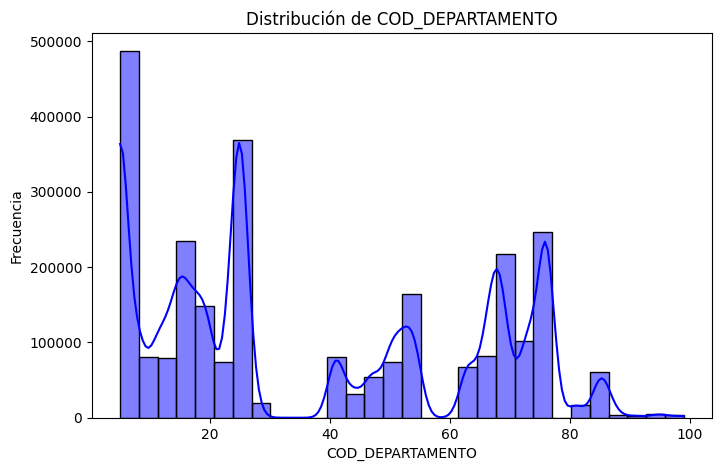

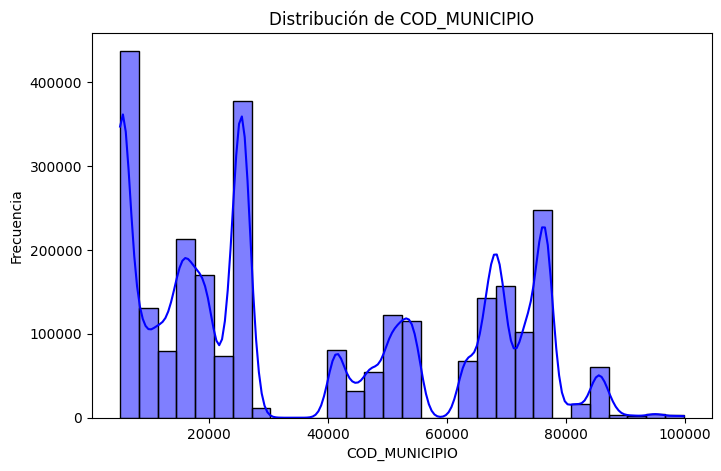

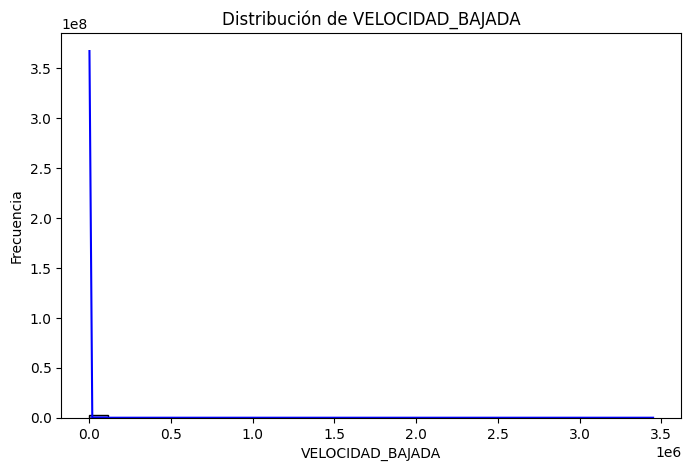

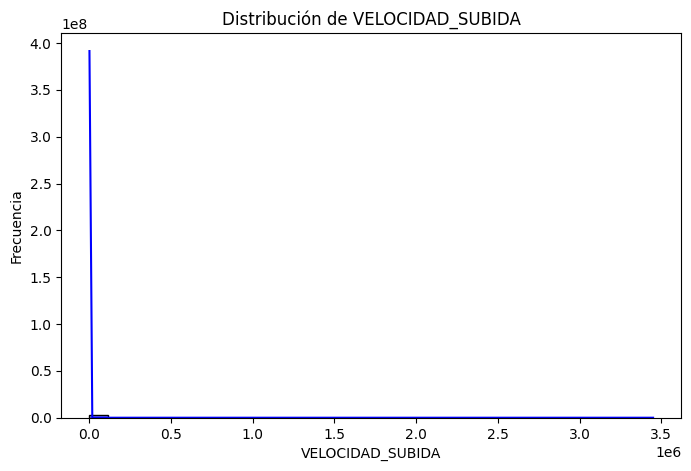

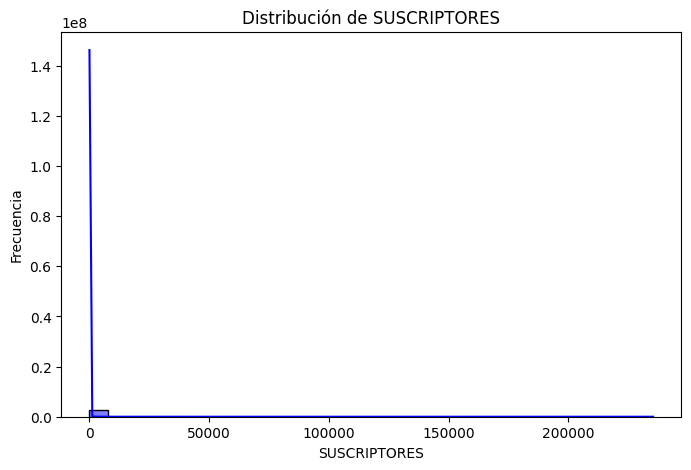

In [ ]:
# Histogramas para cada variable numérica, mostrando distribución
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

# **7. DISTRIBUCION DE LAS VARIABLES CATEGORICAS**

<ipython-input-15-7fbc9d524bc1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


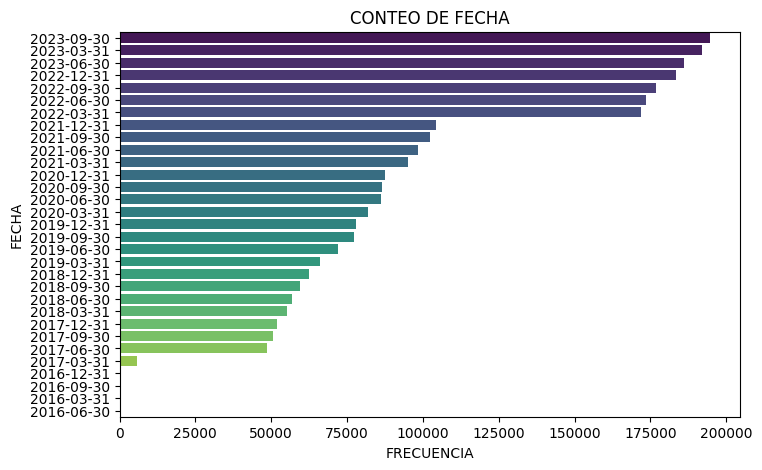

<ipython-input-15-7fbc9d524bc1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


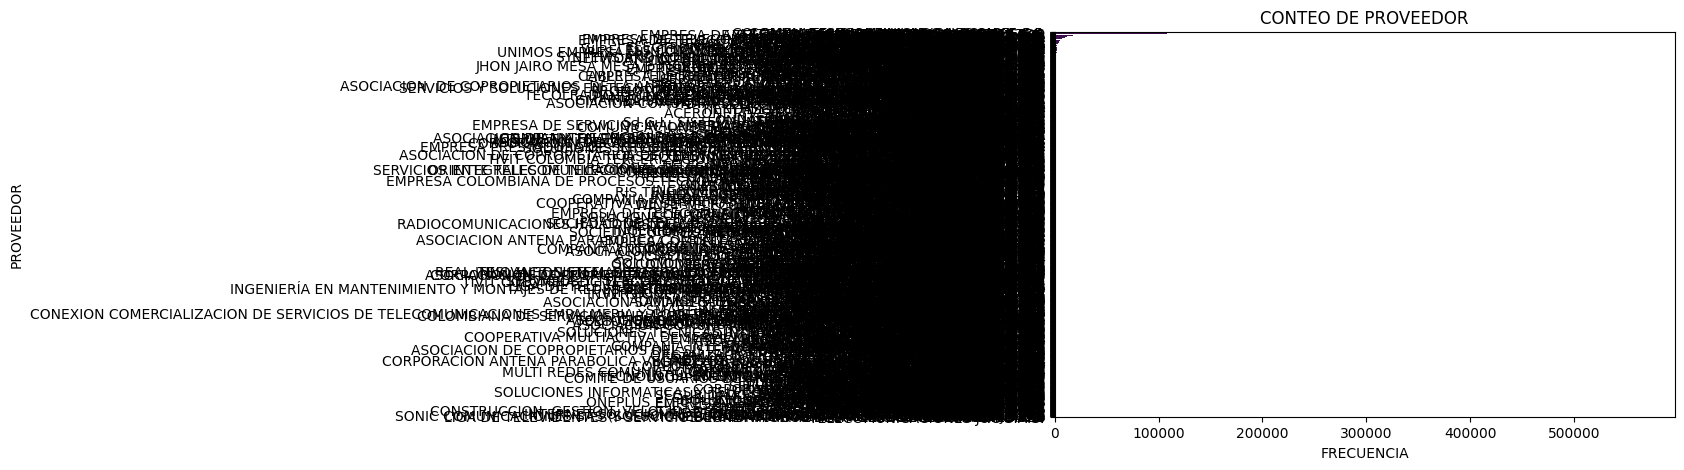

<ipython-input-15-7fbc9d524bc1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


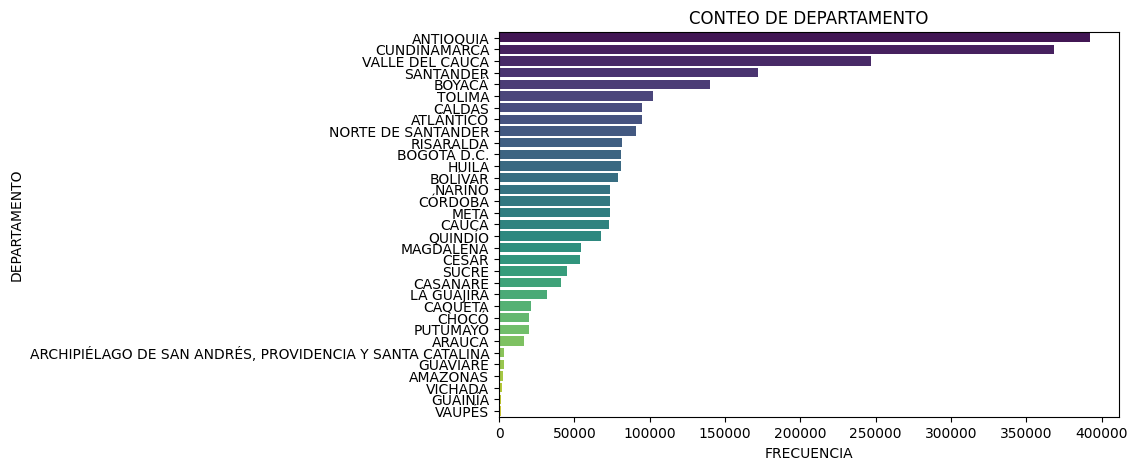

<ipython-input-15-7fbc9d524bc1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


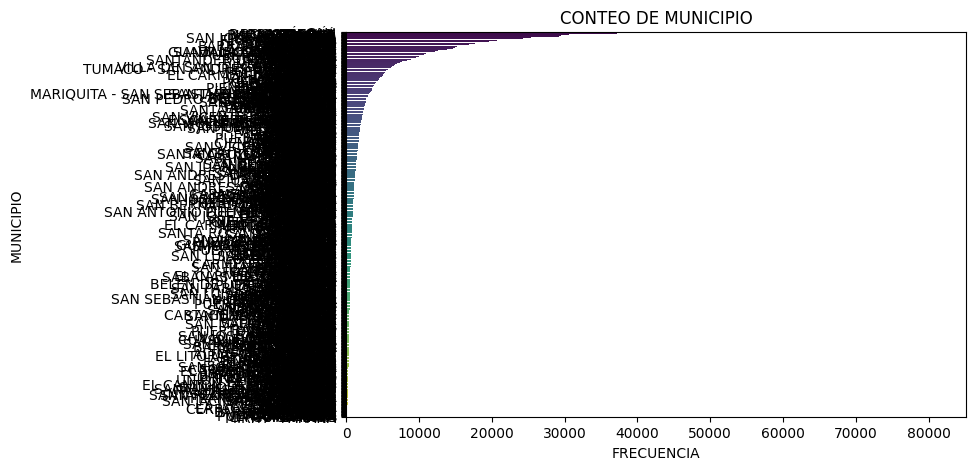

<ipython-input-15-7fbc9d524bc1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


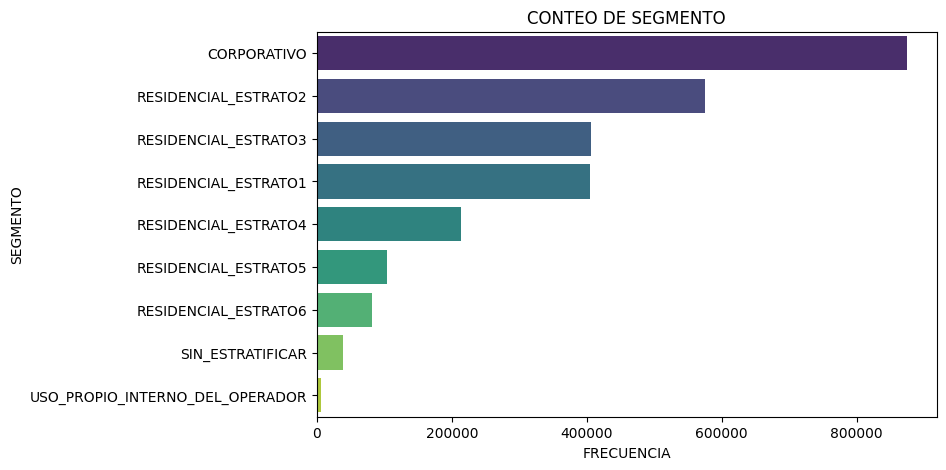

<ipython-input-15-7fbc9d524bc1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


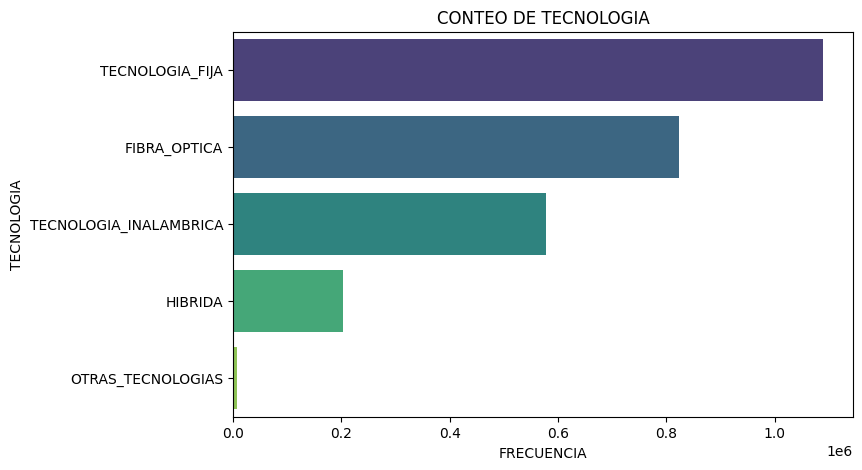

In [ ]:
# ELIMINAR DATOS DESDE 2017 03 13 Y EMPEZAR DESDE AHI, REVISAR DEPARTAMENTOS QUE NO TIENEN IMPORTANCIA O POCOS DATOS

# Gráficos de barras que muestran la frecuencia de cada categoría
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')
    plt.title(f'CONTEO DE {col}')
    plt.xlabel('FRECUENCIA')
    plt.ylabel(col)
    plt.show()

# **8. PENDIENTE POR CORREGIR Y COMPLEMENTAR - ANALISIS DE CORRELACION** *texto en cursiva*

**- MATRIZ DE CORRELACION VARIABLES NUMERICAS**

In [ ]:
# hacer una correlacion de todas las variables en el cuaderno de modelado a ver que tal salen el cuadro gigante

# Relación entre variables numéricas
correlation_matrix = df[numerical_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('MATRIZ DE CORRELACION')
plt.show()

NameError: name 'df' is not defined

**- MATRIZ DE CORRELACION VARIABLES CATEGORICAS**

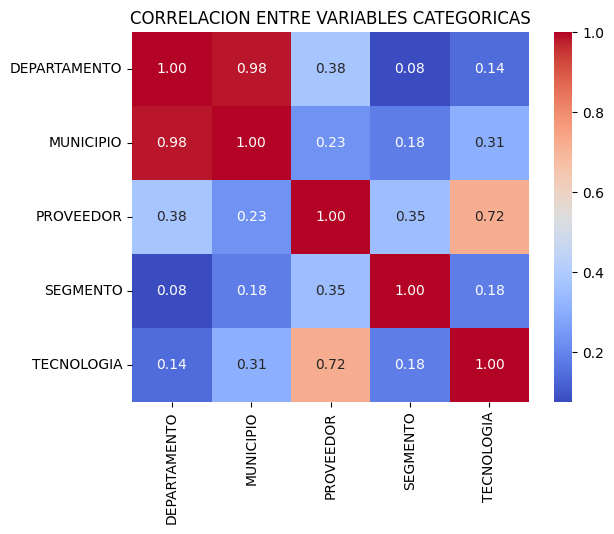

In [ ]:
# TENER EN CUENTA QUE HAY VARIABLES QUE NO SE VAN A UTILIZAR5 Y LAS QUE SI REVISARLAS MUY BIEN, POR EJEMPO DEPARTAMENTO PARA AFUERA

from scipy.stats import chi2_contingency
import scipy.stats as stats

# Función para calcular el coeficiente de Cramér
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Calcular la correlación entre variables categóricas
categorical_cols = ['DEPARTAMENTO', 'MUNICIPIO', 'PROVEEDOR', 'SEGMENTO', 'TECNOLOGIA']
cramers_results = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 == col2:
            cramers_results.loc[col1, col2] = 1.0
        else:
            cramers_results.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Convertir valores a float para heatmap
cramers_results = cramers_results.astype(float)

# Mostrar el heatmap de Cramér's V
sns.heatmap(cramers_results, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('CORRELACION ENTRE VARIABLES CATEGORICAS')
plt.show()


**- MATRIZ DE CORRELACION VARIABLES NUMERICAS Y CATEGORICA**

In [ ]:
# Variables categóricas y numéricas
categorical_var = 'SEGMENTO'
numerical_var = 'SUSCRIPTORES'

# Realizar ANOVA
anova_results = stats.f_oneway(*[df[df[categorical_var] == cat][numerical_var]
                                 for cat in df[categorical_var].unique()])
print(f"Estadístico F: {anova_results.statistic:.2f}, p-valor: {anova_results.pvalue:.4f}")


Estadístico F: 832.72, p-valor: 0.0000


In [ ]:
from scipy import stats

# Variables categóricas y numéricas
categorical_var = 'TECNOLOGIA'
numerical_var = 'SUSCRIPTORES'

# Filtrar categorías con datos válidos
valid_categories = [cat for cat in df[categorical_var].unique()
                    if df[(df[categorical_var] == cat) & (df[numerical_var] > 0)].shape[0] > 0]

# Realizar ANOVA solo con categorías válidas
anova_results = stats.f_oneway(*[df[(df[categorical_var] == cat) & (df[numerical_var] > 0)][numerical_var]
                                 for cat in valid_categories])

# Mostrar los resultados
print(f"Estadístico F: {anova_results.statistic:.2f}, p-valor: {anova_results.pvalue:.4f}")



Estadístico F: 1690.50, p-valor: 0.0000


# **9. Boxplots para detectar outliers en variables numéricas**

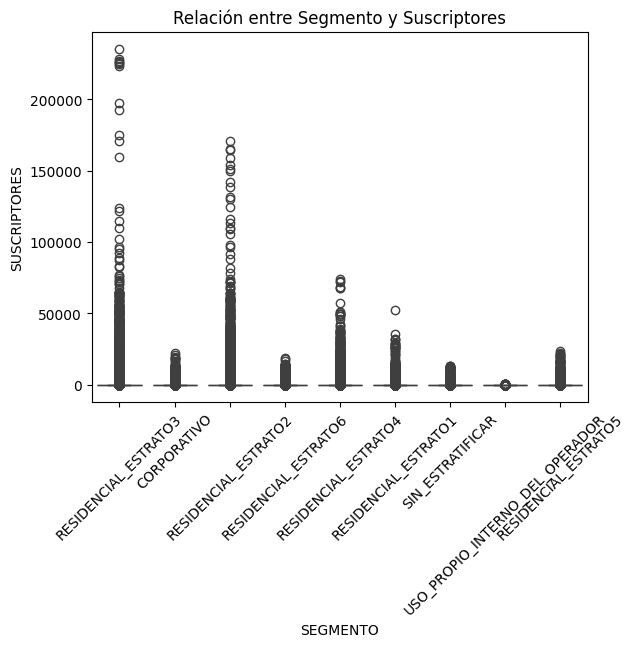

In [ ]:
# rEVISAR SI LOS PRIMEROS DATOS APARECEN COMO NN, SE ELIMINAN O QUE SE HACE CON ELLOS, ADEMAS, ORGANIZAR EN REALIDAD, SE BORRA O SE DEJA SIN ESTRATIFICAR?
# OUTLIDER DE SEGMENTO 2 Y 3 , QUE SE HACE CON ELLOS?


sns.boxplot(x='SEGMENTO', y='SUSCRIPTORES', data=df)
plt.xticks(rotation=45)
plt.title('Relación entre Segmento y Suscriptores')
plt.show()


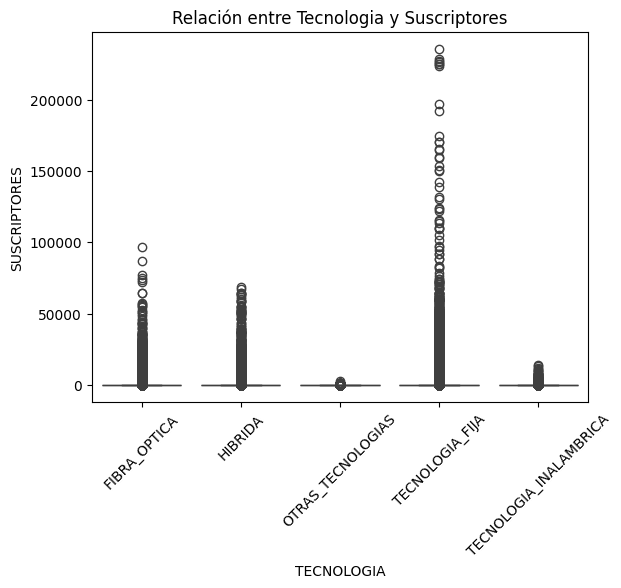

In [ ]:
# OUTLIDER EN TEGNOLOGIA FIJa?

sns.boxplot(x='TECNOLOGIA', y='SUSCRIPTORES', data=df)
plt.xticks(rotation=45)
plt.title('Relación entre Tecnologia y Suscriptores')
plt.show()

<ipython-input-22-751cf2d430c1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='Set2')


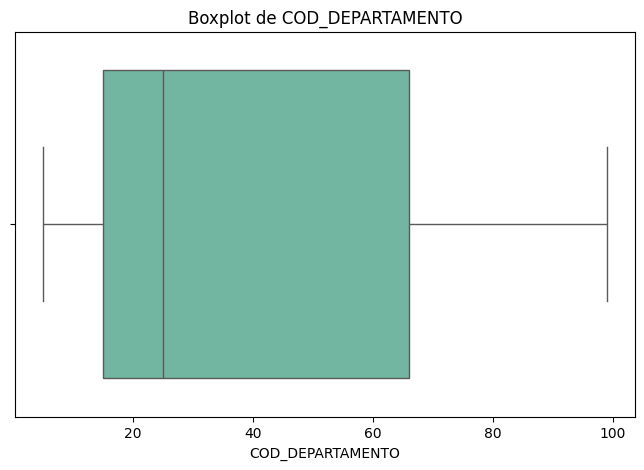

<ipython-input-22-751cf2d430c1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='Set2')


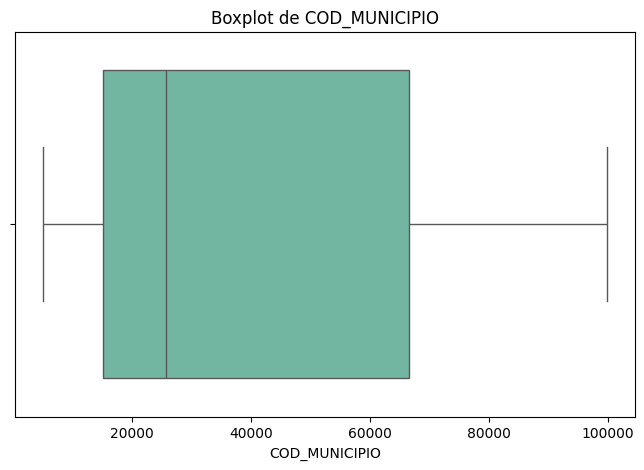

<ipython-input-22-751cf2d430c1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='Set2')


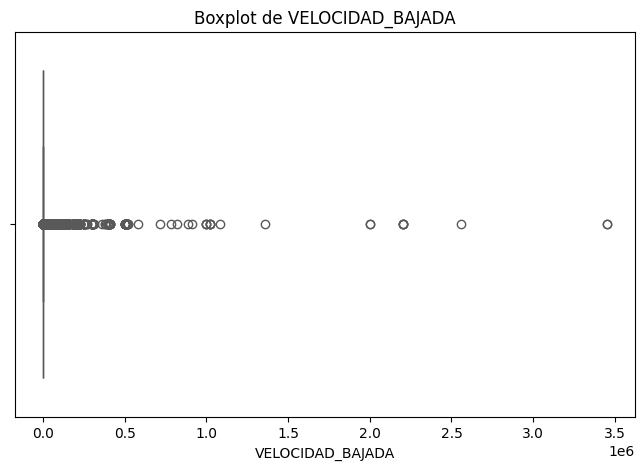

<ipython-input-22-751cf2d430c1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='Set2')


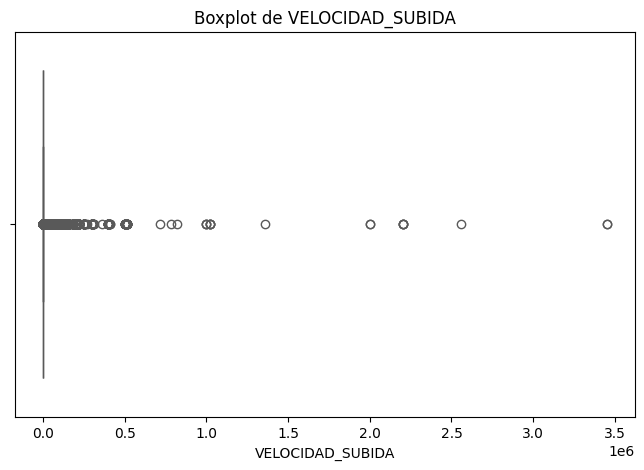

<ipython-input-22-751cf2d430c1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='Set2')


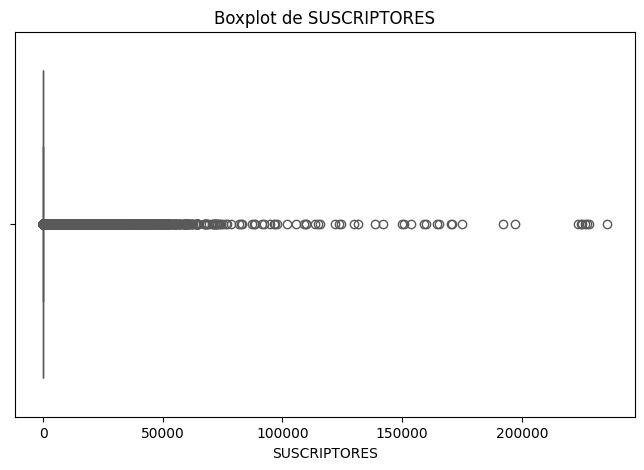

In [ ]:
# Visualiza posibles valores atípicos por variable numérica
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col], palette='Set2')
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.show()

# **10. Distribución conjunta entre variables numéricas**

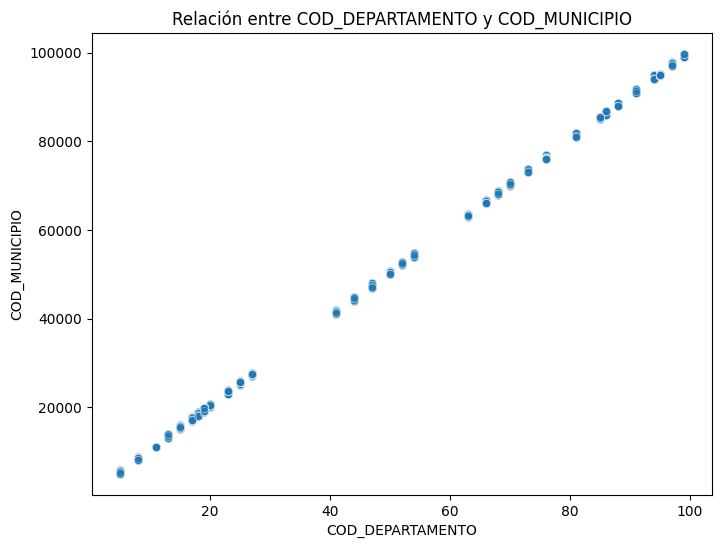

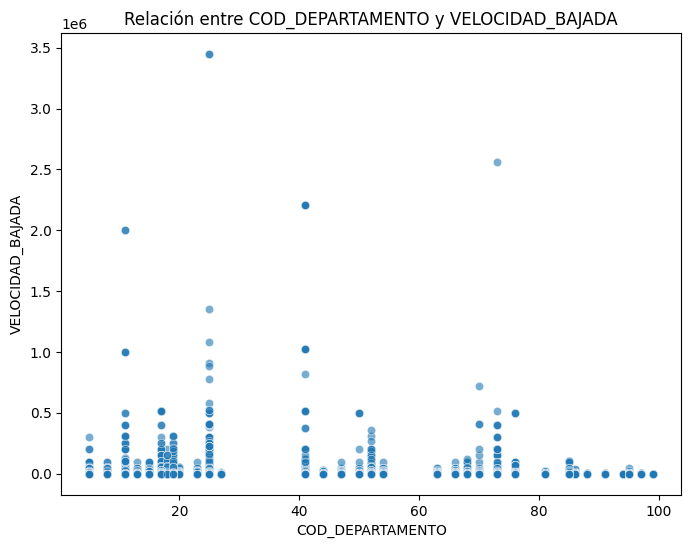

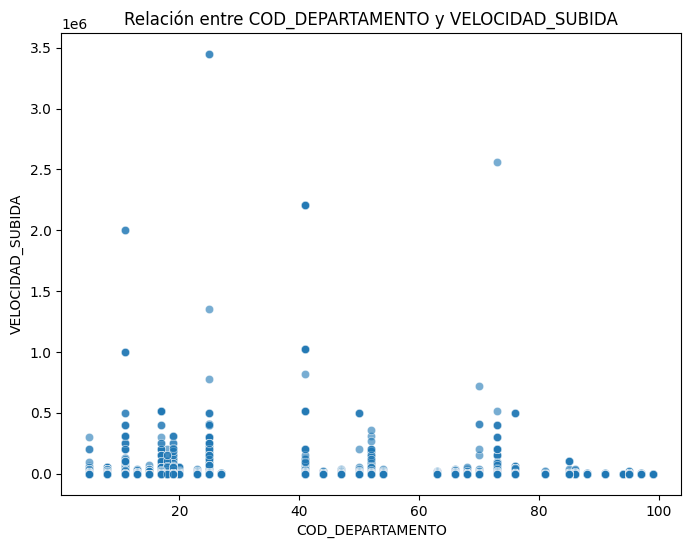

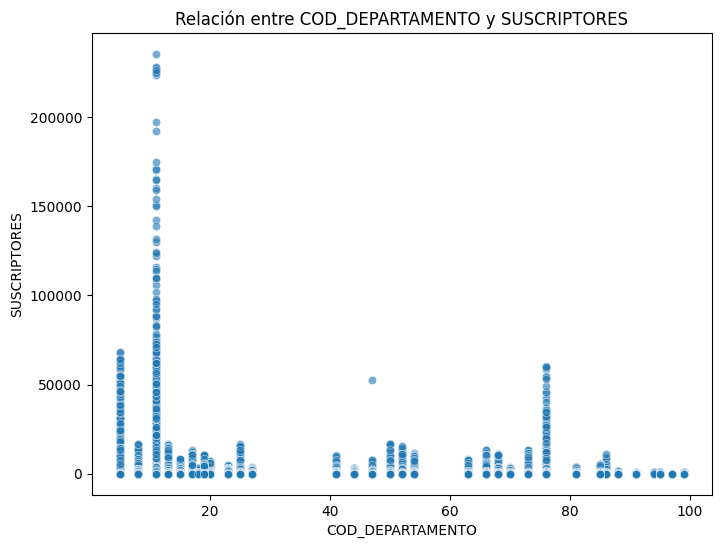

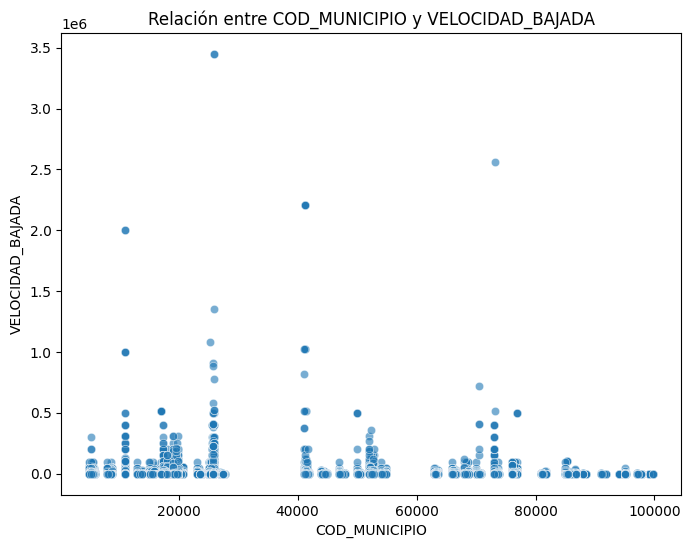

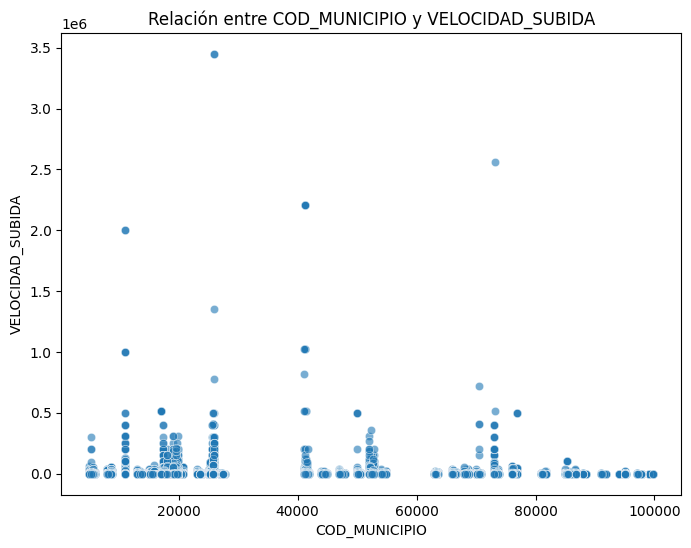

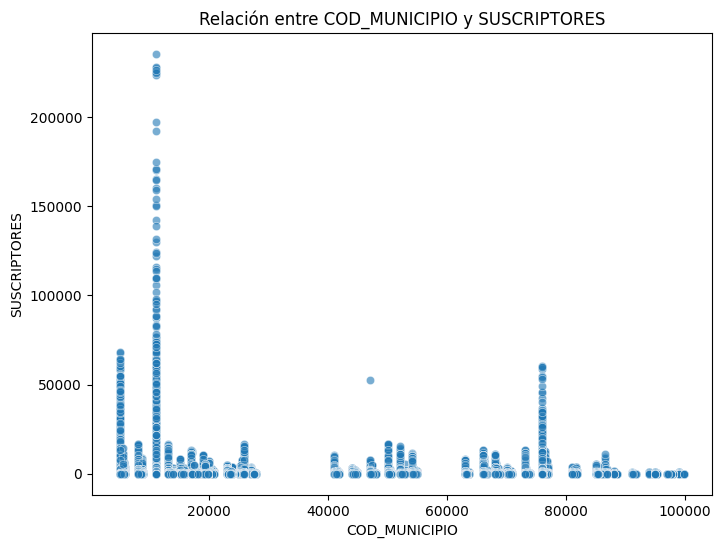

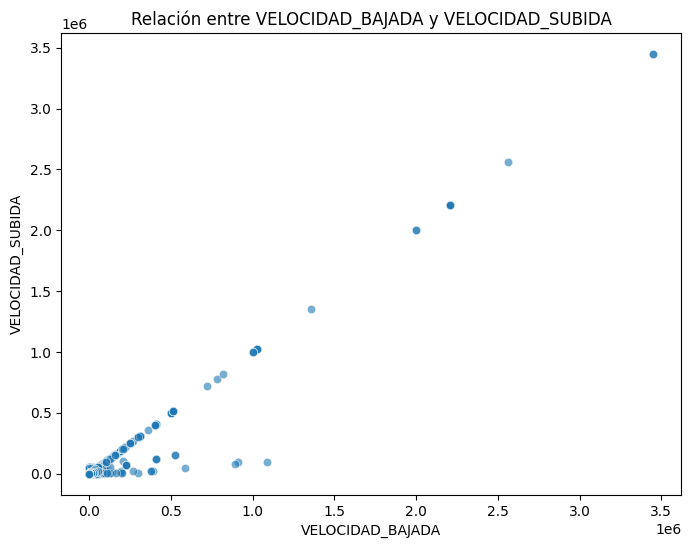

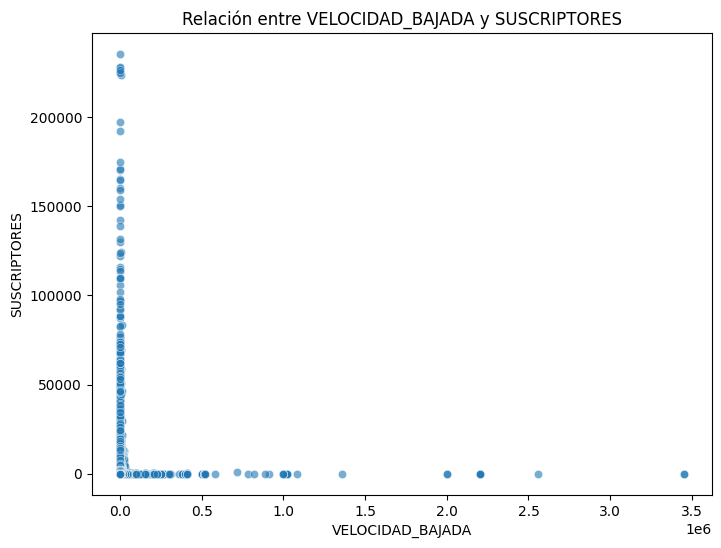

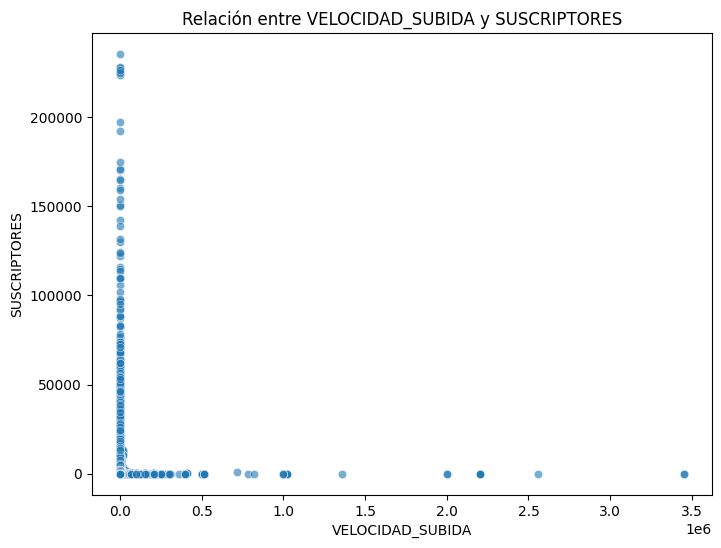

In [ ]:
# Visualiza relaciones mediante gráficos de dispersión
for i, col1 in enumerate(numerical_cols):
    for col2 in numerical_cols[i+1:]:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=df[col1], y=df[col2], alpha=0.6)
        plt.title(f'Relación entre {col1} y {col2}')
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.show()

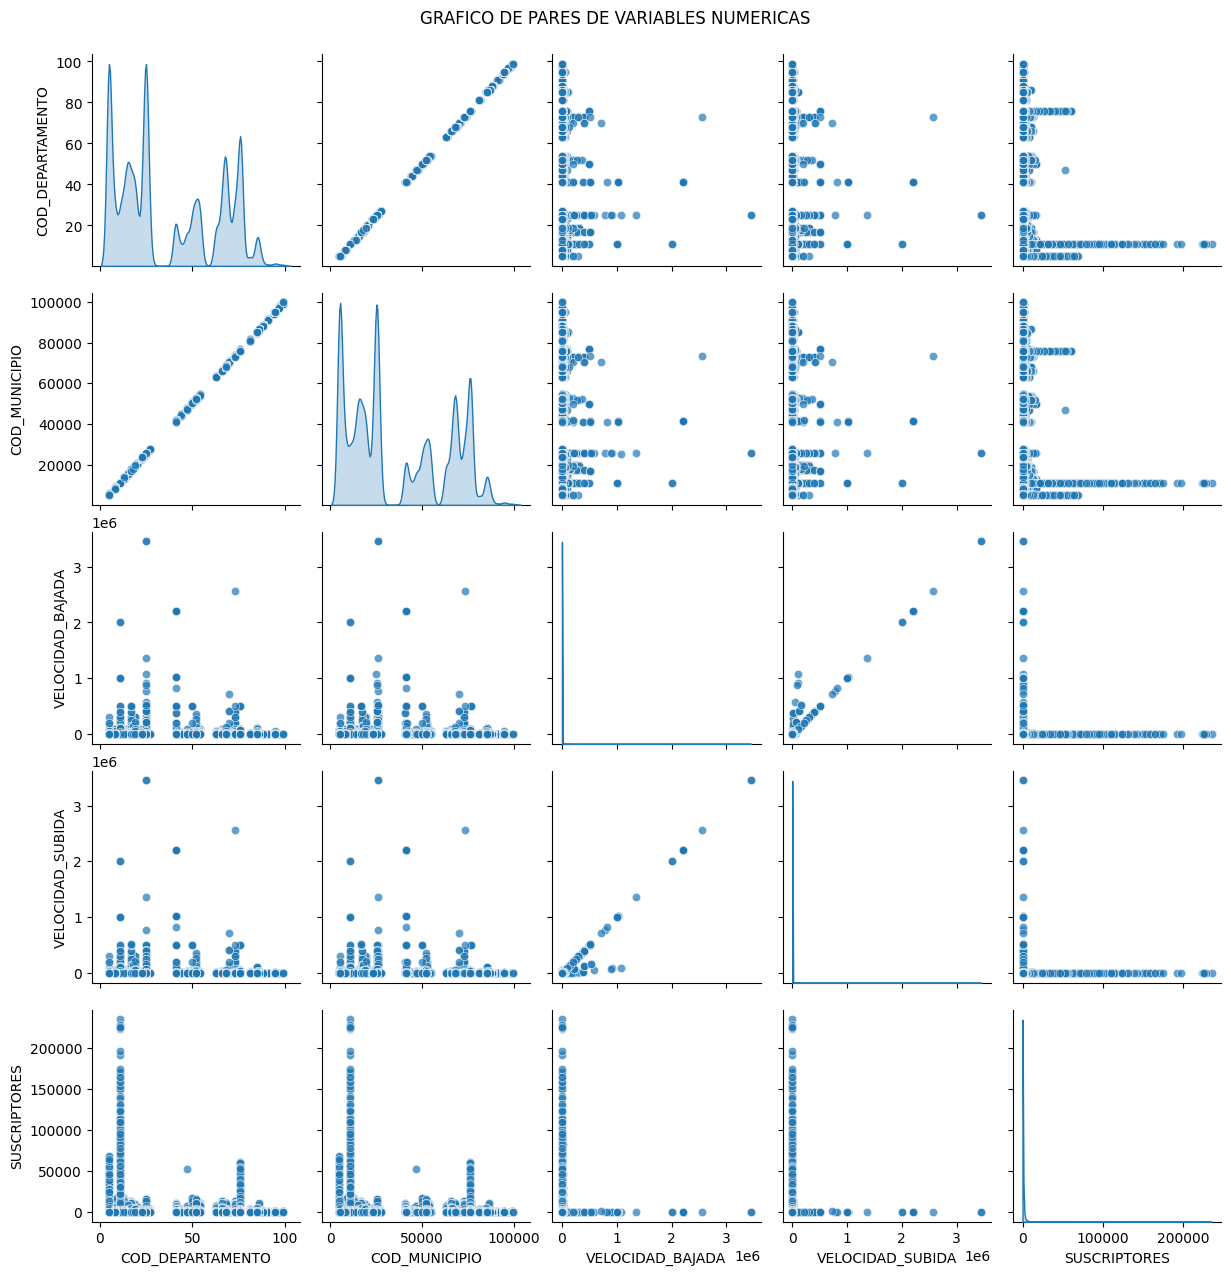

In [ ]:
# Gráfico de pares para múltiples relaciones cruzadas
sns.pairplot(df[numerical_cols], diag_kind='kde', plot_kws={'alpha': 0.7})
plt.suptitle('GRAFICO DE PARES DE VARIABLES NUMERICAS', y=1.02)
plt.show()